In [2]:
#Work Directory

import os
os.chdir('C:\\Users\\Akshay\\Desktop\\Hypothesis Testing\\')
os.getcwd()

'C:\\Users\\Akshay\\Desktop\\Hypothesis Testing'

In [3]:
#Importing data
import pandas as pd
import numpy as np
df = pd.read_csv('brain_size.csv',sep=';',na_values=".")
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [7]:
##Playing with Pandas and Numpy

#t=np.linspace(-6,6,20)
#help(np.linspace)
#sin_t=np.sin(t)
#cos_t=np.cos(t)
#pd.DataFrame({'t':t,'sin':sin_t,'cos':cos_t})

In [25]:
df.shape

(40, 8)

In [27]:
df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [31]:
df[df['Gender']=='Female']['VIQ'].mean()

109.45

In [32]:
pd.DataFrame.describe(df)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,NaN,NaN,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,NaN,NaN,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,NaN,NaN,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [33]:
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print(gender,value.mean())

Female 109.45
Male 115.25


In [34]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [40]:
#help(df.groupby)

grouped = df.groupby(['Gender'])
grouped.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


C:\Program Files\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


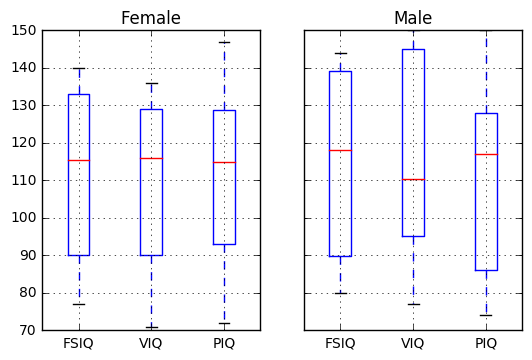

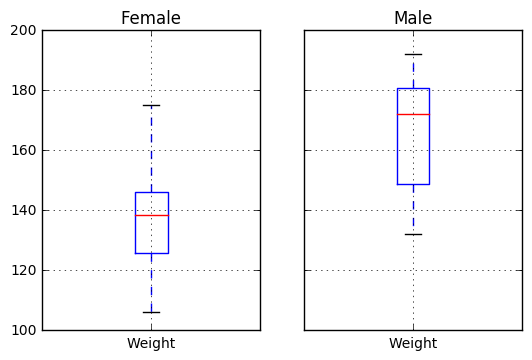

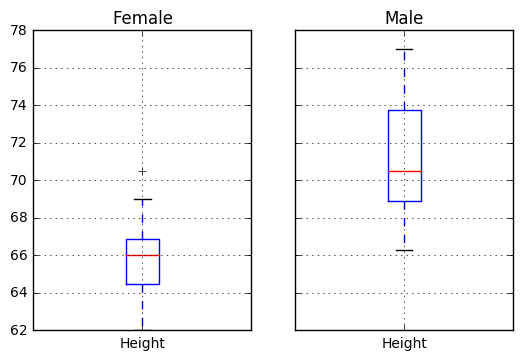

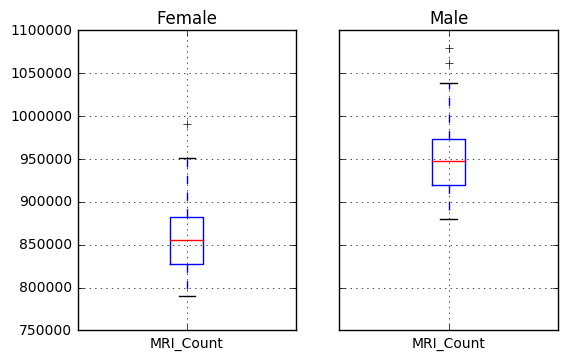

In [62]:
import matplotlib.pyplot as plt
from pandas.tools import plotting

groupby_gender.boxplot(column=['FSIQ','VIQ','PIQ'])
groupby_gender.boxplot(column=['Weight'])
groupby_gender.boxplot(column=['Height'])
groupby_gender.boxplot(column=['MRI_Count'])
plt.show()

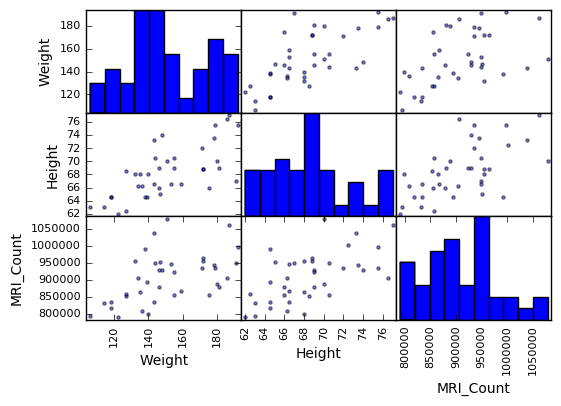

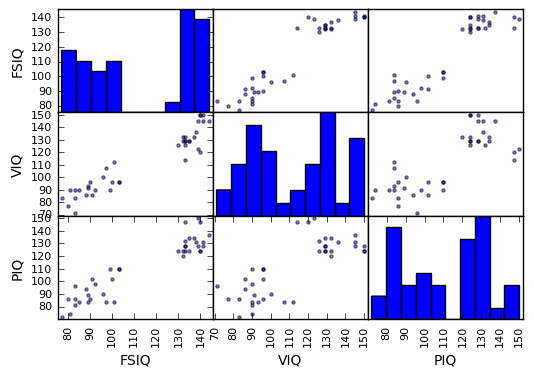

In [65]:
plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(df[['FSIQ','VIQ','PIQ']])
plt.show()

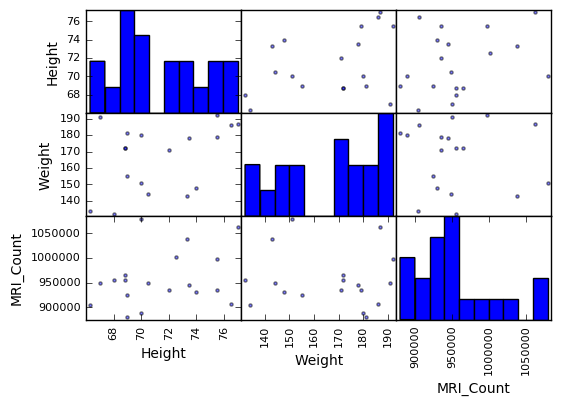

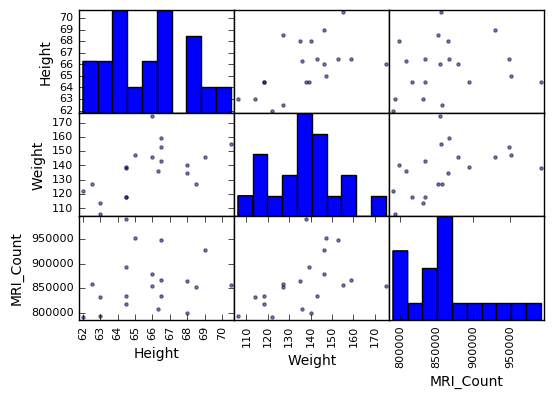

In [81]:
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']
plotting.scatter_matrix(df_male[['Height','Weight','MRI_Count']])
plotting.scatter_matrix(df_female[['Height','Weight','MRI_Count']])
plt.show()

In [6]:
#testing group by
ids = np.linspace(1,10,10)
name = ['a','a','b','b','b','b','c','c','c','d']
category = ['0','0','1','1','0','0','0','1','1','1']
sinids = np.sin(ids)
cosids = np.cos(ids)

dataset = pd.DataFrame({'ids':ids,'name':name,'category':category,'sinids':sinids,'cosids':cosids})

groupby_dataset = dataset.groupby(['category','name'])
sum1 = groupby_dataset['cosids'].sum()
count1 = groupby_dataset['cosids'].count()
mean1 = groupby_dataset['cosids'].mean()

stats = pd.DataFrame({'sum':sum1,'count':count1,'average':mean1})
stats

average  count       sum
category name                           
0        a     0.062078      2  0.124155
         b     0.621916      2  1.243832
         c     0.753902      1  0.753902
1        b    -0.821818      2 -1.643636
         c    -0.528315      2 -1.056630
         d    -0.839072      1 -0.839072

In [112]:
settest = set(name)
settest

{'a', 'b', 'c', 'd'}

In [8]:
from scipy import stats
stats.ttest_1samp(df['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)